In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("data_after_feature_engg.csv")

In [4]:
df.sample(3)

,Unnamed: 0,Facing,No_Bedroom,No_Bathroom,No_Balcony,Corner_Property,Furnishing,Price_in_Crore,price_Per_Sqft_converted,study room,servant room,store room,pooja room,Overlooking_others,Overlooking_main road,Overlooking_sea facing,Overlooking_club,Overlooking_park/garden,Overlooking_pool,Overlooking_lake facing,Overlooking_NA,flat_age,sector_num,luxury_score,Text_info,Super Built-up Area,floor_ratio
2236,2236,0.0,3,3.0,3,1,1.0,2.5,10347.0,0,1,0,0,1,1,0,1,1,1,0,0,3,67,82,This beautiful 3 bhk flat in sector 67a gurgao...,2416.00,0.736842
12288,12288,2.0,2,2.0,3,1,2.0,2.1,12062.0,1,1,0,1,1,1,1,1,1,1,0,0,3,85,97,Looking for a 2 bhk property for sale in gurga...,1741.00,0.384615
8307,8307,0.0,3,3.0,2,1,1.0,1.4,11173.0,0,0,0,1,1,1,0,1,1,1,0,0,2,95,182,Landmark avana is one of gurgaon's most sought...,1691.55,0.750000


In [5]:
df.columns

Index(['Unnamed: 0', 'Facing', 'No_Bedroom', 'No_Bathroom', 'No_Balcony',
       'Corner_Property', 'Furnishing', 'Price_in_Crore',
       'price_Per_Sqft_converted', 'study room', 'servant room', 'store room',
       'pooja room', 'Overlooking_others', 'Overlooking_main road',
       'Overlooking_sea facing', 'Overlooking_club', 'Overlooking_park/garden',
       'Overlooking_pool', 'Overlooking_lake facing', 'Overlooking_NA',
       'flat_age', 'sector_num', 'luxury_score', 'Text_info',
       'Super Built-up Area', 'floor_ratio'],
      dtype='object')

In [6]:
df[df['Price_in_Crore'] > 40][abs((df['Super Built-up Area'] * df['price_Per_Sqft_converted'])/10000000 - df['Price_in_Crore']) > 30]
    

C:\Users\dell\AppData\Local\Temp\ipykernel_12792\21268025.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Price_in_Crore'] > 40][abs((df['Super Built-up Area'] * df['price_Per_Sqft_converted'])/10000000 - df['Price_in_Crore']) > 30]


,Unnamed: 0,Facing,No_Bedroom,No_Bathroom,No_Balcony,Corner_Property,Furnishing,Price_in_Crore,price_Per_Sqft_converted,study room,servant room,store room,pooja room,Overlooking_others,Overlooking_main road,Overlooking_sea facing,Overlooking_club,Overlooking_park/garden,Overlooking_pool,Overlooking_lake facing,Overlooking_NA,flat_age,sector_num,luxury_score,Text_info,Super Built-up Area,floor_ratio
5437,5437,0.0,5,7.0,2,1,1.0,60.0,94191.0,1,1,0,1,0,1,0,1,1,1,0,0,4,42,182,Flr (Fastlane realtors) your way to experience...,9800.0,0.666667


C:\Users\dell\AppData\Local\Temp\ipykernel_12792\1581879670.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price_in_Crore'])


<Axes: xlabel='Price_in_Crore', ylabel='Density'>

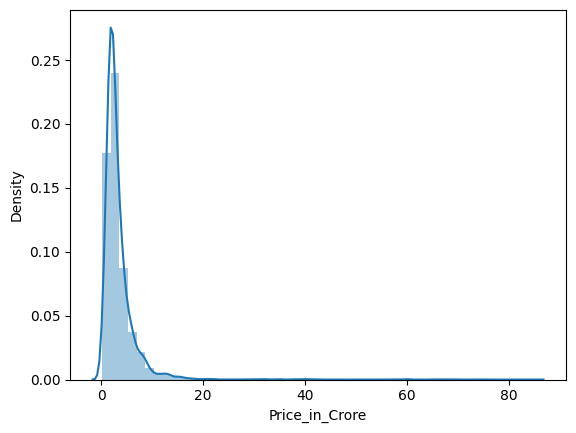

In [7]:
sns.distplot(df['Price_in_Crore'])

<Axes: xlabel='Price_in_Crore'>

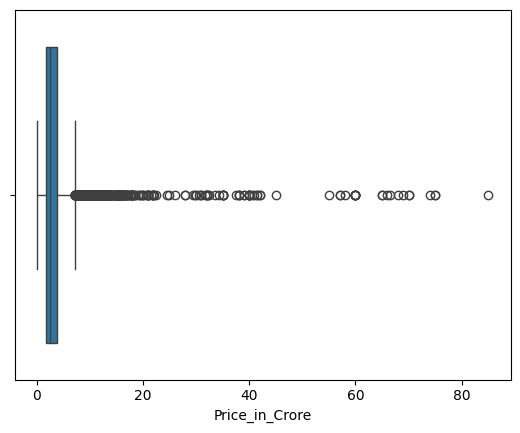

In [8]:
sns.boxplot(x=df['Price_in_Crore'])

In [9]:

Q1 = df['Price_in_Crore'].quantile(0.25)
Q3 = df['Price_in_Crore'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Price_in_Crore'] < lower_bound) | (df['Price_in_Crore'] > upper_bound)]

num_outliers = outliers.shape[0]
outliers_price_stats = outliers['Price_in_Crore'].describe()

num_outliers, outliers_price_stats

(930,
 count    930.000000
 mean      12.705439
 std       10.233964
 min        7.200000
 25%        8.010000
 50%        9.225000
 75%       12.900000
 max       85.000000
 Name: Price_in_Crore, dtype: float64)

In [10]:
outliers.sort_values('Price_in_Crore', ascending = False).head(4)

,Unnamed: 0,Facing,No_Bedroom,No_Bathroom,No_Balcony,Corner_Property,Furnishing,Price_in_Crore,price_Per_Sqft_converted,study room,servant room,store room,pooja room,Overlooking_others,Overlooking_main road,Overlooking_sea facing,Overlooking_club,Overlooking_park/garden,Overlooking_pool,Overlooking_lake facing,Overlooking_NA,flat_age,sector_num,luxury_score,Text_info,Super Built-up Area,floor_ratio
5214,5214,4.0,6,7.0,3,0,0.0,85.0,77272.0,0,1,0,1,0,0,0,0,0,0,0,1,3,42,80,Dlf the camellias is a prestigious ultra-Luxur...,11000.0,0.447368
5068,5068,4.0,5,7.0,4,1,1.0,75.0,57692.0,1,1,0,1,0,0,0,1,1,0,0,0,3,42,96,Prime location super ultra luxury residency fl...,13000.0,0.447368
5215,5215,4.0,5,7.0,3,0,0.0,75.0,78947.0,0,1,0,0,0,0,0,0,0,0,0,1,3,42,80,Dlf the camellias is a prestigious ultra-Luxur...,9500.0,0.526316
6505,6505,0.0,5,5.0,4,1,1.0,74.0,75510.0,1,1,1,1,1,0,0,1,1,1,0,0,3,42,189,"Dlf the magnolias, located in the prestigious ...",9800.0,0.625000


In [11]:
# on the basis of price col we can say that there are some genuine outliers but there are some data erros as well

C:\Users\dell\AppData\Local\Temp\ipykernel_12792\3157417670.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_Per_Sqft_converted'])


<Axes: xlabel='price_Per_Sqft_converted', ylabel='Density'>

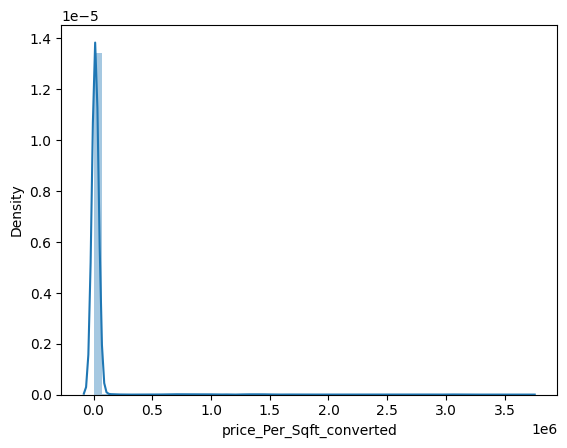

In [12]:
sns.distplot(df['price_Per_Sqft_converted'])

<Axes: xlabel='price_Per_Sqft_converted'>

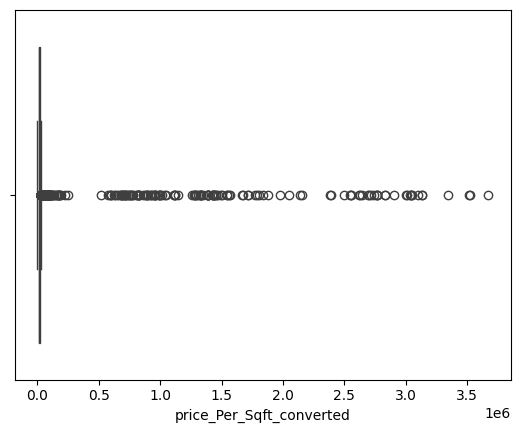

In [13]:
sns.boxplot(x=df['price_Per_Sqft_converted'])

In [14]:
Q1 = df['price_Per_Sqft_converted'].quantile(0.25)
Q3 = df['price_Per_Sqft_converted'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_sqft = df[(df['price_Per_Sqft_converted'] < lower_bound) | (df['price_Per_Sqft_converted'] > upper_bound)]

num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_Per_Sqft_converted'].describe()

num_outliers, outliers_sqft_stats

(672,
 count    6.720000e+02
 mean     3.513521e+05
 std      7.133829e+05
 min      2.880600e+04
 25%      3.151700e+04
 50%      3.750000e+04
 75%      8.971175e+04
 max      3.673527e+06
 Name: price_Per_Sqft_converted, dtype: float64)

C:\Users\dell\AppData\Local\Temp\ipykernel_12792\1114685728.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Super Built-up Area'])


<Axes: xlabel='Super Built-up Area', ylabel='Density'>

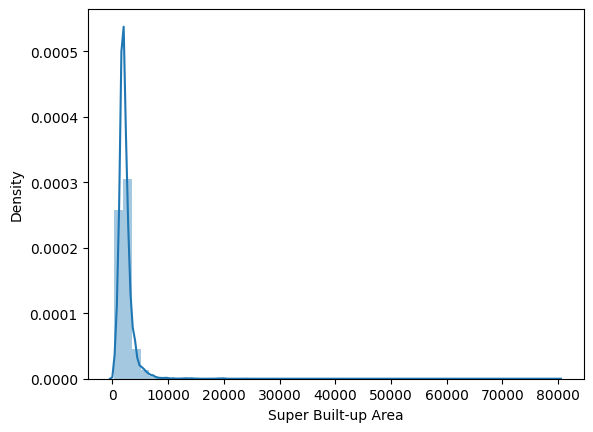

In [15]:
sns.distplot(df['Super Built-up Area'])

In [16]:
df['Super Built-up Area'].describe()

count    12444.000000
mean      2321.862918
std       1555.103880
min        300.000000
25%       1650.000000
50%       2025.000000
75%       2660.000000
max      79805.250000
Name: Super Built-up Area, dtype: float64

In [17]:
df['Super Built-up Area'].quantile([0.9 , 0.95 , 0.995])

0.900    3541.000
0.950    4348.500
0.995    8791.335
Name: Super Built-up Area, dtype: float64

<Axes: xlabel='Super Built-up Area', ylabel='Price_in_Crore'>

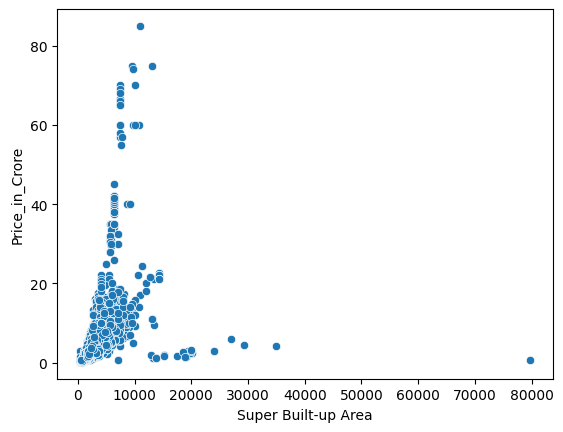

In [18]:
sns.scatterplot(x = df['Super Built-up Area'] , y = df['Price_in_Crore'])

In [20]:
df = df[ (df['Super Built-up Area'] < 25000) ]

<Axes: xlabel='price_Per_Sqft_converted', ylabel='Price_in_Crore'>

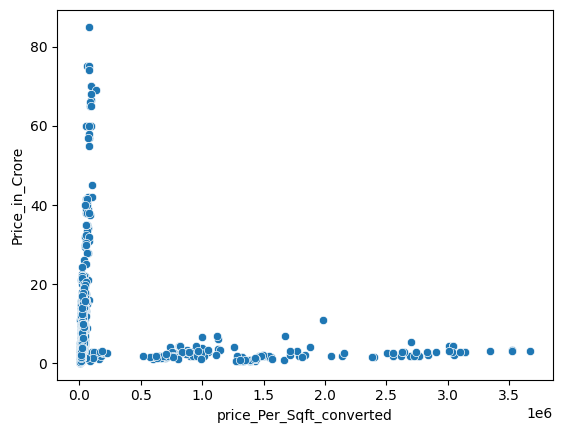

In [21]:
sns.scatterplot(x = df['price_Per_Sqft_converted'] , y = df['Price_in_Crore'])